In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

envpool found!


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import envpool

In [4]:
env1 = envpool.make_gymnasium('Breakout-v5', num_envs=64, stack_num=1)
env1.reset();

t0 = time.time()
for i in tqdm(range(1000)):
    env1.step(np.random.randint(0, 18, size=64))
t1 = time.time()
print((1000*64)/(t1-t0), 'SPS')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.60it/s]

8223.00087390009 SPS


In [73]:
env = make_env(n_envs=64)
env.reset();

envpool found!


In [74]:
buffer = Buffer(256, 64, env, device='cpu')
agent = RandomAgent(18)

KeyError: 'obs'

In [ ]:
%%time
buffer.collect(agent, 4)

In [69]:
%%time
for i in range(256):
    env.step(np.random.randint(0, 18, size=64))

CPU times: user 44.3 s, sys: 210 ms, total: 44.5 s
Wall time: 3.4 s


In [72]:
%%time
for i in range(256):
    env1.step(np.random.randint(0, 18, size=64))

CPU times: user 32.2 s, sys: 81.1 ms, total: 32.3 s
Wall time: 2.25 s


In [77]:
env = envpool.make_gymnasium('Breakout-v5', num_envs=64, stack_num=1)
env.observation_space = None

AttributeError: property 'observation_space' of 'AtariGymnasiumEnvPool' object has no setter

In [23]:
%%time
def make_env_single(env_id="Breakout", frame_stack=4):
    env = gym.make(f"ALE/{env_id}-v5", frameskip=1, full_action_space=True)
    # TODO: reduce space of actions
    env = gym.wrappers.AtariPreprocessing(env, terminal_on_life_loss=True)
    env = gym.wrappers.FrameStack(env, num_stack=frame_stack)
    return env
make_fn = partial(make_env_single, env_id='Breakout', frame_stack=4)
make_fns = [make_fn for _ in range(64)]
env2 = gym.vector.SyncVectorEnv(make_fns)

CPU times: user 12.5 s, sys: 88.1 ms, total: 12.6 s
Wall time: 12.6 s


In [24]:
%%time
env2.reset()
for i in tqdm(range(1000)):
    env2.step(np.random.randint(0, 15, size=64))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.66it/s]

CPU times: user 1min 44s, sys: 171 ms, total: 1min 44s
Wall time: 1min 44s


In [6]:
%%time
env1 = envpool.make('Breakout-v5', env_type='gym', num_envs=256, stack_num=4, batch_size=64, num_threads=64)

CPU times: user 1min 33s, sys: 211 ms, total: 1min 33s
Wall time: 2.76 s


In [ ]:
%%time
env1.reset()
for i in tqdm(range(1000)):
    env1.step(np.random.randint(0, 15, size=64))
    

  0%|                                                                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]

In [31]:
2048*512*84*84/1e9

7.398752256

In [47]:
torch.arange(64)%32

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [17]:
env1 = envpool.make('Breakout-v5', env_type='gym', num_envs=8, stack_num=4, seed=0,
                    noop_max=30, episodic_life=False, full_action_space=True, use_fire_reset=False, )
obs = env1.reset()



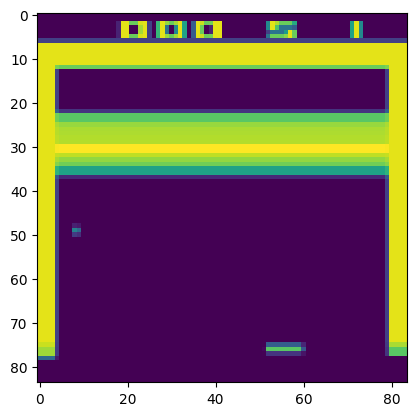

In [23]:
plt.imshow(obs[0, -1])

In [ ]:
episodic_life (bool): make end-of-life == end-of-episode, but only reset on true game over. It helps the value estimation. Default to False;
zero_discount_on_life_loss (bool): when the agent losses a life, the discount in dm_env.TimeStep is set to 0. This option doesn’t affect gym’s behavior (since there is no discount field in gym’s API). Default to False;
reward_clip (bool): whether to change the reward to sign(reward), default to False;
repeat_action_probability (float): the action repeat probability in ALE configuration, default to 0 (no action repeat to perform deterministic result);
use_inter_area_resize (bool): whether to use cv::INTER_AREA for image resize, default to True.

In [50]:
envs = []
for i in tqdm(range(10)):
    env = envpool.make('Breakout-v5', env_type='gym', num_envs=8, stack_num=4)
    envs.append(env)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.34it/s]


In [1]:
import train_dt2

/data/vision/phillipi/akumar01/miniconda3/envs/egb/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
args = train_dt2.parse_args('--device cuda'.split())
print(args)

Namespace(batch_size=1024, collect_size=8192, ctx_len=4, device='cpu', ent_coef=0.01, entity=None, env_id='Pong', frame_stack=4, freq_collect=10, gamma=0.99, load_agent=None, log_video=False, lr=0.0006, lr_min=6e-05, lr_schedule=True, max_grad_norm=0.5, n_envs=64, n_iters=1000, n_steps=128, name=None, obj='ext', project=None, save_agent=None, seed=0, torch_deterministic=True, track=False)


In [ ]:
train_dt2.main(args)

Printing DTGPT Summary...
125571
num decayed parameter tensors: 12, with 125,312 parameters
num non-decayed parameter tensors: 10, with 259 parameters
using fused AdamW: False


A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
  0%|                                                                                                                                                                                                                       | 0/1000 [00:00<?, ?it/s]

collect: dt_const=0.083, dt_inf=0.317, dt_env=0.989
collect: dt_const=0.037, dt_inf=0.247, dt_env=0.952
collect: dt_const=0.031, dt_inf=0.238, dt_env=0.760
collect: dt_const=0.031, dt_inf=0.238, dt_env=0.818


In [1]:
from collections import deque

In [3]:
d = deque(maxlen=10)

In [4]:
for i in range(20):
    d.append(i)
    print(d)

deque([0], maxlen=10)
deque([0, 1], maxlen=10)
deque([0, 1, 2], maxlen=10)
deque([0, 1, 2, 3], maxlen=10)
deque([0, 1, 2, 3, 4], maxlen=10)
deque([0, 1, 2, 3, 4, 5], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8], maxlen=10)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], maxlen=10)
deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], maxlen=10)
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11], maxlen=10)
deque([3, 4, 5, 6, 7, 8, 9, 10, 11, 12], maxlen=10)
deque([4, 5, 6, 7, 8, 9, 10, 11, 12, 13], maxlen=10)
deque([5, 6, 7, 8, 9, 10, 11, 12, 13, 14], maxlen=10)
deque([6, 7, 8, 9, 10, 11, 12, 13, 14, 15], maxlen=10)
deque([7, 8, 9, 10, 11, 12, 13, 14, 15, 16], maxlen=10)
deque([8, 9, 10, 11, 12, 13, 14, 15, 16, 17], maxlen=10)
deque([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], maxlen=10)
deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)


In [48]:
import time
from contextlib import contextmanager
from collections import defaultdict

class Timer:
    def __init__(self):
        self.times = defaultdict(float)
        
    @contextmanager
    def time(self, key):
        before = time.time()
        yield None
        time.time()
        self.times[key] += (time.time()-before)
        
    
timer = Timer()
with timer.time('env') as f:
    print(f)
    time.sleep(1.)
    print('lalalla')

None
lalalla


In [49]:
timer.times

defaultdict(float, {'env': 1.0024609565734863})

In [144]:
a = deque(maxlen=5)
a.append(np.zeros(3))
a.append(np.zeros(3))

In [146]:
np.stack(a).shape

(2, 3)

([1, 2, 3, 4], deque([1, 2, 3, 4, 5], maxlen=5))

In [96]:
import gymnasium as gym
import gymnasium.wrappers.normalize as normalize



In [132]:
norm = normalize.RunningMeanStd(shape=10)

In [133]:
norm.update(np.ones((10)))

In [134]:
norm.mean

array([0.99999, 0.99999, 0.99999, 0.99999, 0.99999, 0.99999, 0.99999,
       0.99999, 0.99999, 0.99999])

In [135]:
norm.count

10.0001

In [147]:
import wandb

In [151]:
vid = np.random.randint(0, 255, size=(100, 84, 84)).astype(np.uint8)
wandb.Video(vid)

ValueError: Video must be atleast 4 dimensions: time, channels, height, width

In [152]:
wandb.__version__

'0.15.4'

In [166]:
torch.manual_seed(0)

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


class Agent(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            layer_init(nn.Conv2d(4, 32, 8, stride=4)),
            nn.ReLU(),
            layer_init(nn.Conv2d(32, 64, 4, stride=2)),
            nn.ReLU(),
            layer_init(nn.Conv2d(64, 64, 3, stride=1)),
            nn.ReLU(),
            nn.Flatten(),
            layer_init(nn.Linear(64 * 7 * 7, 512)),
            nn.ReLU(),
        )
        self.actor = layer_init(nn.Linear(512, 18), std=0.01)
        self.critic = layer_init(nn.Linear(512, 1), std=1)

    def get_value(self, x):
        return self.critic(self.network(x / 255.0))

    def get_action_and_value(self, x, action=None):
        hidden = self.network(x / 255.0)
        logits = self.actor(hidden)
        probs = Categorical(logits=logits)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action), probs.entropy(), self.critic(hidden)
    
agent = Agent()
np.array([p.sum().item() for p in agent.parameters()])

array([ -1.93428278,   0.        ,   8.6830616 ,   0.        ,
        -6.88403606,   0.        , -10.22880268,   0.        ,
         0.03645384,   0.        ,  -0.85234404,   0.        ])

In [168]:
torch.manual_seed(0)

def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


class Agent(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(4, 32, 8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 512),
            nn.ReLU(),
        )
        self.actor = nn.Linear(512, 18)
        self.critic = nn.Linear(512, 1)

    def get_value(self, x):
        return self.critic(self.network(x / 255.0))

    def get_action_and_value(self, x, action=None):
        hidden = self.network(x / 255.0)
        logits = self.actor(hidden)
        probs = Categorical(logits=logits)
        if action is None:
            action = probs.sample()
        return action, probs.log_prob(action), probs.entropy(), self.critic(hidden)
    
agent = Agent()
np.array([p.sum().item() for p in agent.parameters()])

array([-1.01812518e+00, -1.39392614e-01,  6.56081009e+00,  1.15206823e-01,
       -3.90144610e+00,  3.45844626e-01, -1.82324791e+00, -8.67850184e-02,
        6.26007002e-03,  0.00000000e+00, -3.47416848e-01,  0.00000000e+00])

In [217]:
import gym.wrappers.normalize

In [253]:
rms = gym.wrappers.normalize.RunningMeanStd()
rms.update(np.full(100, fill_value=1))
print((1-rms.mean)/(np.sqrt(rms.var)+1e-6))
print((100-rms.mean)/(np.sqrt(rms.var)+1e-6))
rms.update(np.full(1, fill_value=100))
print((1-rms.mean)/(np.sqrt(rms.var)+1e-6))
print((100-rms.mean)/(np.sqrt(rms.var)+1e-6))

0.0007066069574991711
69954.15944962457
-0.09999983674737523
10.00000387674515


In [262]:
a = torch.randn(10)

In [7]:
import torch

In [18]:
from timers import Timer
from buffers2 import Buffer
buffer = Buffer(64, 256, None, device='mps')

In [24]:
# %%timeit
timer = Timer()

for i in range(256):
    with timer.add_time('construct'):
        buffer._construct_agent_input(i, 32)
print(dict(timer.key2time))

{'construct': 0.09844613075256348}


In [25]:
t = []
for i in range(256):
    timer = Timer()
    with timer.add_time('construct'):
        buffer._construct_agent_input(i, 32)
    t.append(timer.key2time['construct'])

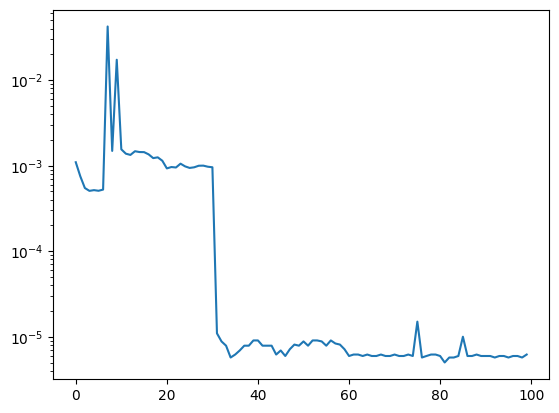

In [30]:
plt.plot(t[:100])
plt.yscale('log')

In [40]:
for i in range(1, 610):
    if i%(610//10)==0:
        print(i, i//(610//10))

61 1
122 2
183 3
244 4
305 5
366 6
427 7
488 8
549 9


In [41]:
wandb.init()

wandb: Currently logged in as: akarshkumar0101. Use `wandb login --relogin` to force relogin


In [45]:
wandb.log(dict(hello=5), step=20)

In [31]:
buffer.obss = torch.arange(32).repeat(1, 1)
buffer.acts = torch.arange(32).repeat(1, 1)

In [39]:
for i in range(20):
    print(buffer._construct_agent_input(i, 5)['obs'][0])
    print(buffer._construct_agent_input(i, 5)['act'][0])
    print(buffer._construct_agent_input(i, 5)['rew'][0])
    print()

tensor([28, 29, 30, 31,  0])
tensor([28, 29, 30, 31])
tensor([0., 0., 0., 0.])

tensor([29, 30, 31,  0,  1])
tensor([29, 30, 31,  0])
tensor([0., 0., 0., 0.])

tensor([30, 31,  0,  1,  2])
tensor([30, 31,  0,  1])
tensor([0., 0., 0., 0.])

tensor([31,  0,  1,  2,  3])
tensor([31,  0,  1,  2])
tensor([0., 0., 0., 0.])

tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3])
tensor([0., 0., 0., 0.])

tensor([1, 2, 3, 4, 5])
tensor([1, 2, 3, 4])
tensor([0., 0., 0., 0.])

tensor([2, 3, 4, 5, 6])
tensor([2, 3, 4, 5])
tensor([0., 0., 0., 0.])

tensor([3, 4, 5, 6, 7])
tensor([3, 4, 5, 6])
tensor([0., 0., 0., 0.])

tensor([4, 5, 6, 7, 8])
tensor([4, 5, 6, 7])
tensor([0., 0., 0., 0.])

tensor([5, 6, 7, 8, 9])
tensor([5, 6, 7, 8])
tensor([0., 0., 0., 0.])

tensor([ 6,  7,  8,  9, 10])
tensor([6, 7, 8, 9])
tensor([0., 0., 0., 0.])

tensor([ 7,  8,  9, 10, 11])
tensor([ 7,  8,  9, 10])
tensor([0., 0., 0., 0.])

tensor([ 8,  9, 10, 11, 12])
tensor([ 8,  9, 10, 11])
tensor([0., 0., 0., 0.])

tensor([ 9, 10, 11

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run imports.py

envpool found!


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
from buffers2 import Buffer
from ppo_rnd_envpool import Agent

In [23]:
env = make_env('BeamRider', n_envs=128, obj='ext', device='cpu')
buffer = Buffer(128, 128, env, device='cpu')
agent = Agent(env)

In [24]:
%prun buffer.collect(agent, 4)

Collection time breakdown:
construct_agent_input         : 0.005
agent_inference               : 8.747
env_step                      : 1.683
 

         45639 function calls (43016 primitive calls) in 10.515 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      387    7.400    0.019    7.400    0.019 {built-in method torch.conv2d}
      128    1.595    0.012    1.600    0.013 envpool.py:124(recv)
      774    1.010    0.001    1.010    0.001 {built-in method torch._C._nn.linear}
      129    0.222    0.002    8.744    0.068 ppo_rnd_envpool.py:213(forward)
      903    0.073    0.000    0.073    0.000 {built-in method torch.relu}
      128    0.044    0.000    0.046    0.000 envpool.py:114(send)
        1    0.032    0.032   10.514   10.514 buffers2.py:45(collect)
      128    0.013    0.000    0.013    0.000 {built-in method torch.multinomial}
      128    0.013    0.000    0.013    0.000 {method 'logsumexp' of 'torch._C._TensorBase' objects}
      128    0.011    0.000    1.679    0.013 env_atari.py:196(step)
      128    0.008    0.000    1.665    0.013 env_atari

In [7]:
logits = torch.randn(100, 10)

In [11]:
a = torch.log_softmax(logits, dim=-1)
b = torch.log_softmax(logits*1e6, dim=-1)

torch.nn.functional.kl_div(a, b, log_target=True, reduction='none').mean()

tensor(0.1197)

In [60]:
num_envs = 32
env = envpool.make('Breakout-v5', 'gym', num_envs=num_envs, reward_clip=True, full_action_space=False)
obs = env.reset()
rews = []
for i in tqdm(range(1000)):
    action = np.array([env.action_space.sample() for _ in range(num_envs)])
    obs, rew, done, info = env.step(action)
    rews.append(rew)
    # assert (rew==info['reward']).all()
rews = np.array(rews)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 220.09it/s]


In [61]:
np.mean(rews)

0.00640625

In [45]:
rew, info['reward']

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

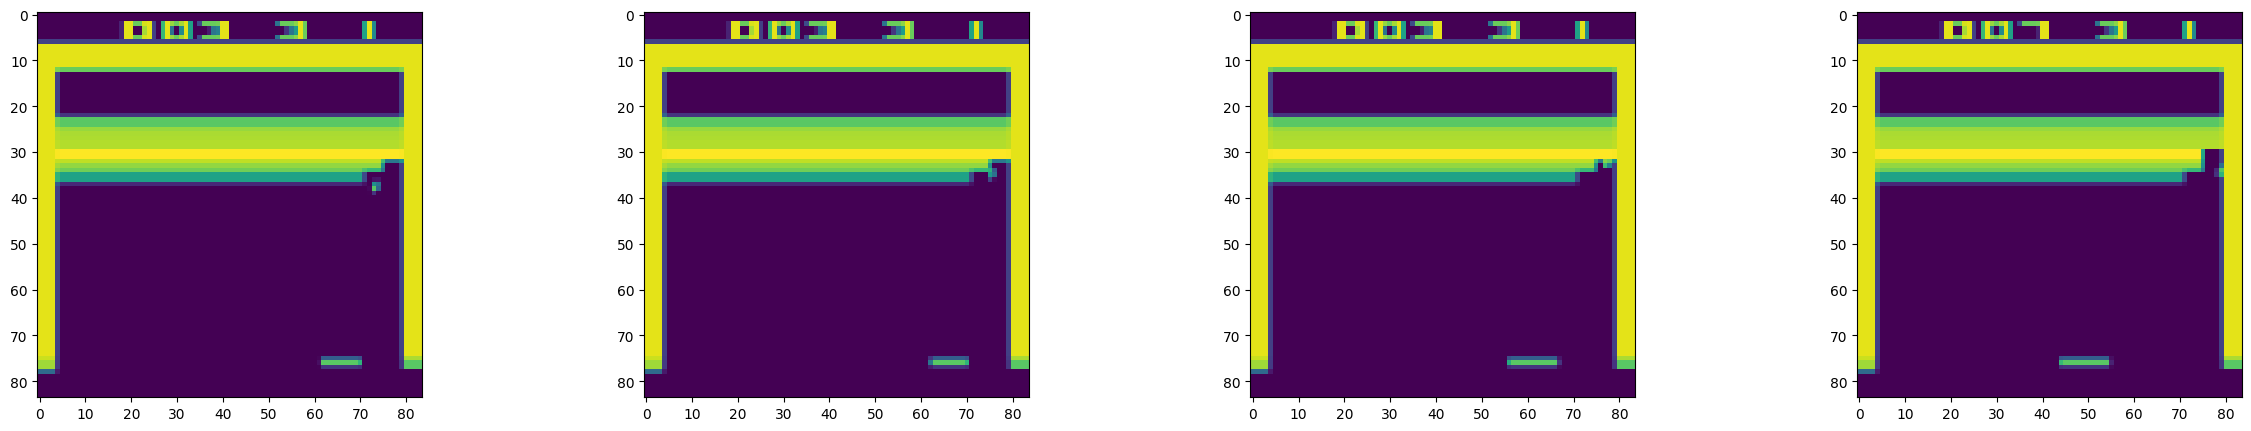

In [50]:
plt.figure(figsize=(30, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(obs[24, i])
plt.show()